The purpose of this notebook is to visualize the graph that will be trained upon by the SNN

In [55]:
# Necesaary Imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Import dataset for graph information

path = "../data/"

graph_df = pd.read_csv(path + "graph.csv", index_col= 0)

In [ ]:
# Find the number of samples of each edge
summer = lambda label: len(graph_df[graph_df["Edge"] == label])

graph_df["Count"] = graph_df["Edge"].map(summer)

In [51]:
# Create a df with only the unique edges

drop_df = graph_df.drop_duplicates(ignore_index= True)


In [53]:
# Create a graph object with the edges
G = nx.Graph()

for i in range(len(drop_df)):
    G.add_edge(drop_df["srcip"][i], drop_df["dstip"][i], weight = drop_df["Count"][i])

Text(0.5, 0.98, 'Visualization of the Network Graph')

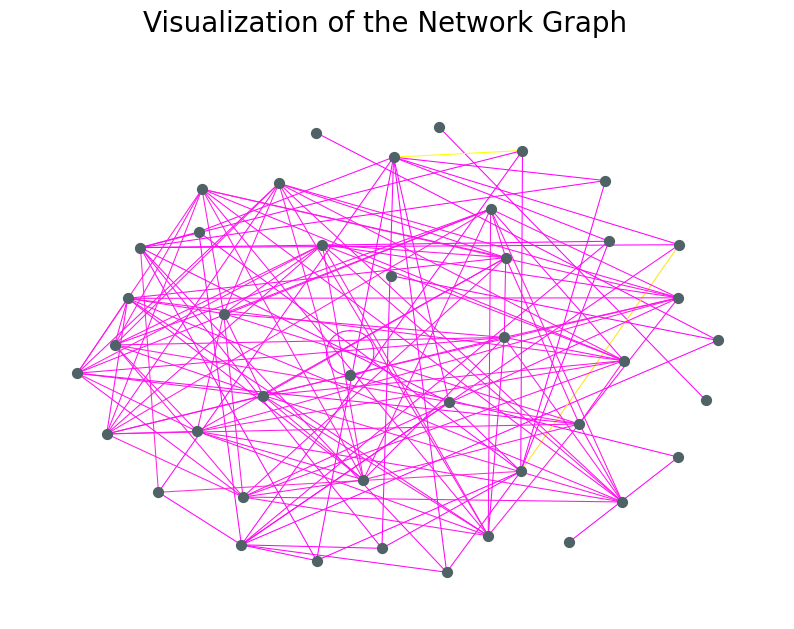

In [71]:
# Display the graph
fig, ax = plt.subplots(figsize = (10,7))
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.arf_layout(G)
nx.draw(G, pos, ax, node_color='#4F6367', edgelist=edges, edge_color=weights, width=0.75, edge_cmap=plt.cm.spring, node_size = 50)

fig.suptitle("Visualization of the Network Graph", fontsize= 20)